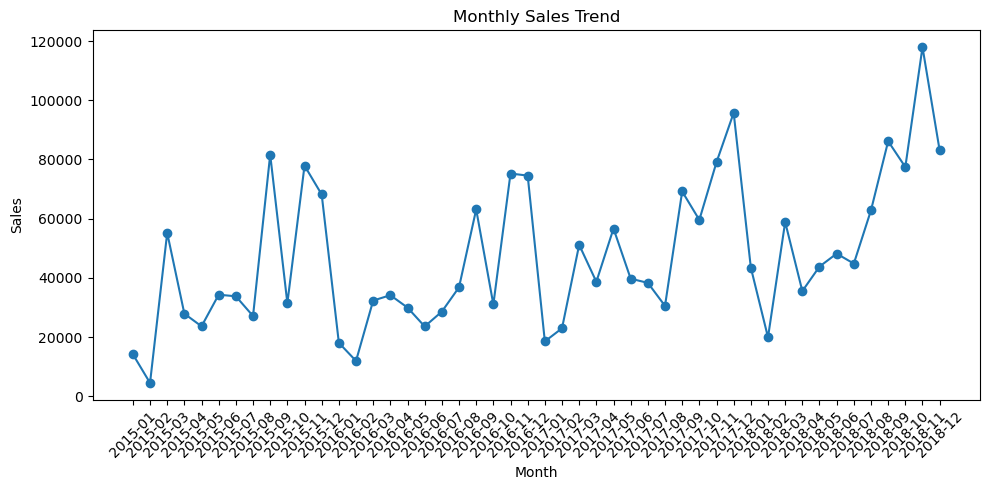

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to your SQLite database
conn = sqlite3.connect("superstore.db")

# Query monthly sales
query = """
SELECT STRFTIME('%Y-%m', Order_Date) AS Order_Month,
       SUM(Sales) AS Monthly_Sales
FROM superstore_clean
GROUP BY Order_Month
ORDER BY Order_Month;
"""
df = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(10,5))
plt.plot(df["Order_Month"], df["Monthly_Sales"], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

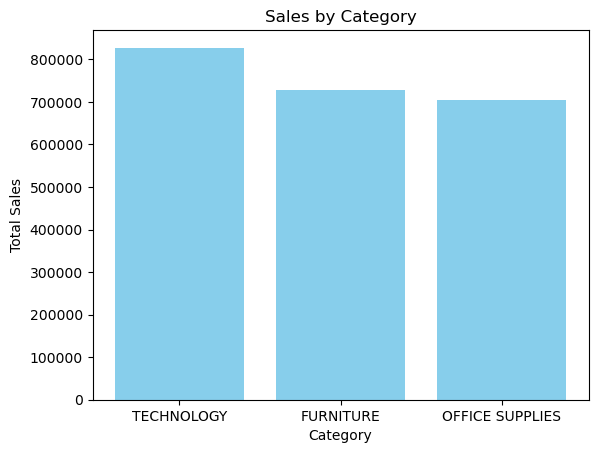

In [2]:
query = """
SELECT Category, SUM(Sales) AS Total_Sales
FROM superstore_clean
GROUP BY Category
ORDER BY Total_Sales DESC;
"""
df = pd.read_sql_query(query, conn)

plt.bar(df["Category"], df["Total_Sales"], color="skyblue")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

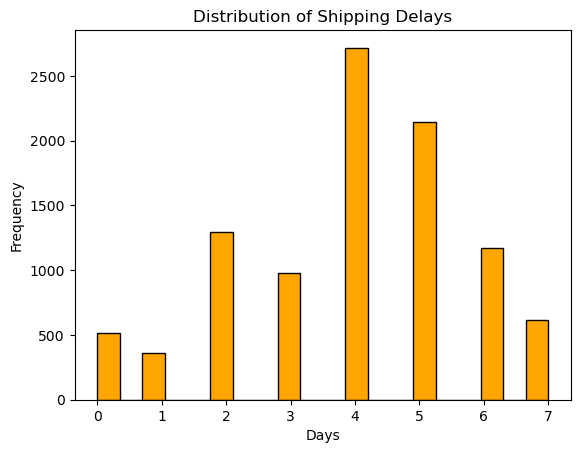

In [3]:
query = """
SELECT (julianday(Ship_Date) - julianday(Order_Date)) AS Shipping_Days
FROM superstore_clean;
"""
df = pd.read_sql_query(query, conn)

plt.hist(df["Shipping_Days"], bins=20, color="orange", edgecolor="black")
plt.title("Distribution of Shipping Delays")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()